In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from fbprophet import Prophet
%matplotlib inline

ERROR:fbprophet:Importing plotly failed. Interactive plots will not work.


In [20]:
df = pd.read_csv('dataset/avocado.csv')
df = df[['Date', 'AveragePrice']].dropna()

df['Date'] = pd.to_datetime(df['Date'])
df = df.set_index('Date')

daily_df = df.resample('D').mean()
d_df = daily_df.reset_index().dropna()

In [12]:
d_df = d_df.set_index('Date')

In [13]:
d_df

,AveragePrice
Date,
2015-01-04,1.301296
2015-01-11,1.370648
2015-01-18,1.391111
2015-01-25,1.397130
2015-02-01,1.247037
...,...
2018-02-25,1.359630
2018-03-04,1.350185
2018-03-11,1.335093


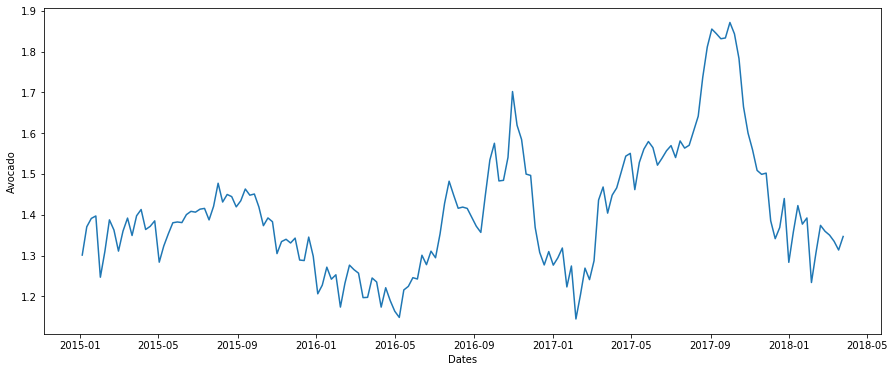

In [18]:
plt.figure(figsize=(15,6))
plt.plot(d_df.index, d_df.values)
plt.xlabel('Dates')
plt.ylabel('Avocado')
plt.show()

In [21]:
d_df.columns = ['ds', 'y']

m = Prophet()
m.fit(d_df)

future = m.make_future_dataframe(periods=90)
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head()

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,yhat,yhat_lower,yhat_upper
0,2015-01-04,1.348361,1.263626,1.429661
1,2015-01-11,1.356433,1.269111,1.437282
2,2015-01-18,1.353645,1.267900,1.439562
3,2015-01-25,1.329287,1.244797,1.412271
4,2015-02-01,1.295306,1.211691,1.378601


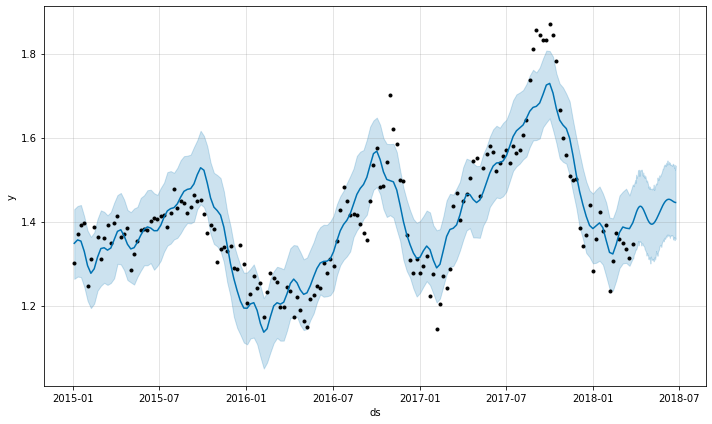

In [22]:
fig1 = m.plot(forecast)

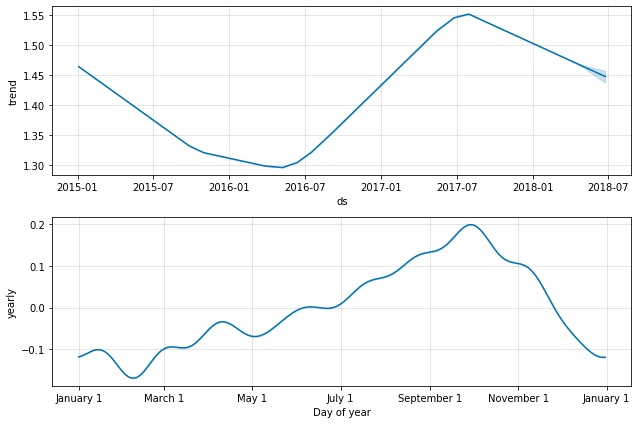

In [23]:
fig2 = m.plot_components(forecast)

In [24]:
from fbprophet.diagnostics import cross_validation, performance_metrics
df_cv = cross_validation(m, horizon='90 days')
df_p = performance_metrics(df_cv)
df_p.head(5)

INFO:fbprophet:Making 17 forecasts with cutoffs between 2016-01-05 00:00:00 and 2017-12-25 00:00:00


,horizon,mse,rmse,mae,mape,coverage
0,9 days,0.011677,0.108061,0.081047,0.057257,0.357143
1,10 days,0.010887,0.104341,0.078217,0.055422,0.380952
2,11 days,0.009002,0.094878,0.069967,0.049439,0.476190
3,12 days,0.008892,0.094296,0.069259,0.048492,0.523810
4,13 days,0.010532,0.102628,0.078946,0.056457,0.460317


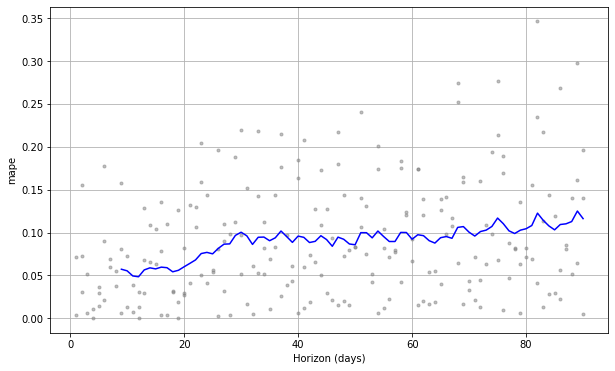

In [25]:
from fbprophet.plot import plot_cross_validation_metric
fig3 = plot_cross_validation_metric(df_cv, metric='mape')